# Math for ML PS 3 Programming Part
[25 points] In this programming part, you will implement gradient descent from scratch and analyze its behavior on a few simple functions. Then, you'll use it on a real dataset and analyze its behavior on that dataset.

To submit, just fill in all the code cells with:

```
# YOUR CODE HERE #
```

or the appropriate variations (the problems will guide you in this).

You should turn in this `.ipynb` notebook into Gradescope per the homework submission instructions on the course webpage.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()
import numpy as np

## Implementing Gradient Descent
In this first part, you will write a function that implements gradient descent from scratch. Recall from lecture that the pseudocode for gradient descent is as follows:

**Input:** Function $f: \mathbb{R}^d \rightarrow \mathbb{R}$. Initial point $\mathbf{x}_0 \in \mathbb{R}^d$. Step size $\eta \in \mathbb{R}$.

For $t = 1, 2, 3, \dots$
- Compute $\mathbf{x}_t \leftarrow \mathbf{x}_{t - 1} - \eta \nabla f(\mathbf{x}_{t - 1})$.
- If $\mathbf{x}_t - \mathbf{x}_{t - 1}$ is sufficiently small, **return** $\nabla f(\mathbf{x}_t)$.

In this problem, we'll deal with functions that take as input a point in $\mathbf{x} \in \mathbb{R}^d$ encoded as a `numpy` array and returns a scalar value in $\mathbb{R}$, which will be a `float`.

For example, the following code cell defines the function $f(x_1, x_2) = x_1^2 + x_2^2$.

In [ ]:
def f(x):
    return x[0] ** 2 + x[1] ** 2

In [ ]:
# Consider a couple of values
x1 = np.array([1, 2])
x2 = np.array([3, 4])
print("The value of f at (1,2) is {}".format(f(x1)))
print("The value of f at (3,4) is {}".format(f(x2)))

The value of f at (1,2) is 5
The value of f at (3,4) is 25


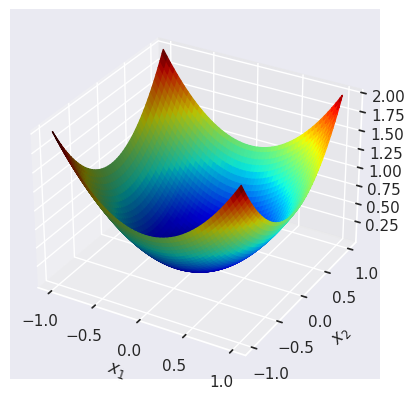

In [ ]:
X = np.linspace(-1, 1, 100)
Y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])

# Plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, facecolors = cm.jet(Z/np.amax(Z)))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.show()

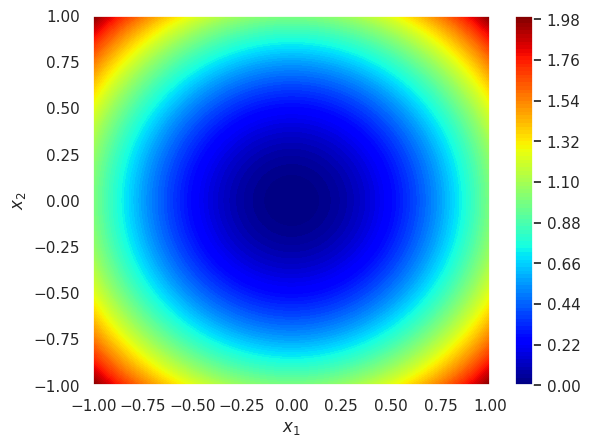

In [ ]:
cmap = plt.colormaps["jet"]
plt.contourf(X, Y, Z, 100, cmap=cmap)
plt.colorbar()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

To make the convention for functions in this problem uniform, we'll make sure that even single-variable functions take as input a `numpy` array of length `1`, outputting a scalar `float`.

For example, take the following function $f(x) = x^2$.

In [ ]:
def f(x):
    return x[0] ** 2

In [ ]:
# Consider a couple of values
x1 = np.array([1])
x2 = np.array([3])
print("The value of f at 1 is {}".format(f(x1)))
print("The value of f at 3 is {}".format(f(x2)))

The value of f at 1 is 1
The value of f at 3 is 9


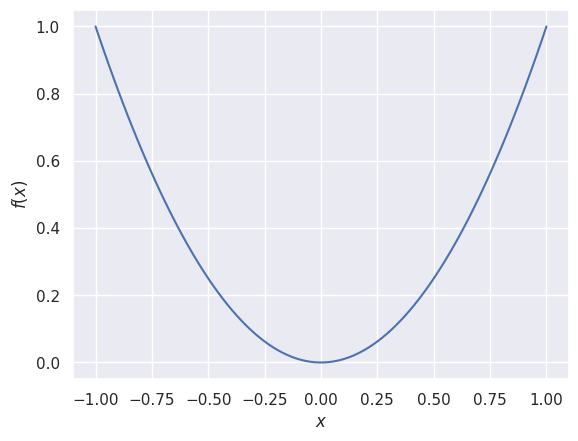

In [ ]:
X = np.linspace(-1, 1, 100).reshape(100, 1)
Y = f([X])
plt.plot(X, Y)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

We'll also deal with these functions' gradients, encoded as Python functions that take as input a `numpy` array in $\mathbb{R}^d$, the input space of the function. They will output a `numpy` array in $\mathbb{R}^d$ of shape `(d,)`, the gradient as a `numpy` array.

For example, the gradient of $f(x_1, x_2) = x_1^2 + x_2^2$ above is

$$
\nabla f(\mathbf{x}) = \begin{bmatrix}
2 x_1 \\
2 x_2
\end{bmatrix}
$$

The following function implements this.

In [ ]:
def grad_f(x):
    return np.array([2 * x[0], 2 * x[1]])

In [ ]:
print("The gradient of f at (1,2) is: {}".format(grad_f(np.array([1, 2]))))
print("The gradient of f at (3,4) is: {}".format(grad_f(np.array([3, 4]))))

The gradient of f at (1,2) is: [2 4]
The gradient of f at (3,4) is: [6 8]


Similarly, for single-variable functions, we'll follow the same convention. That is, single variable gradient functions will take a `numpy` with a single entry. They will output a `numpy` array with a single entry.

In [ ]:
def grad_f(x):
    return np.array([2 * x[0]])

In [ ]:
print("The gradient of f at 1 is: {}".format(grad_f(np.array([1]))))
print("The gradient of f at 3 is: {}".format(grad_f(np.array([3]))))

The gradient of f at 1 is: [2]
The gradient of f at 3 is: [6]


Our implementation of gradient descent will take in five arguments:


1. `f`: A function that takes as input a `numpy` array and outputs a `float`, as above.
2. `grad_f`: A function that takes as input a `numpy` array and outputs a `numpy` array, as above.
3. `eta`: A `float` for the step size $\eta \in \mathbb{R}$.
4. `x0`: A `numpy` array for the initial point, $\mathbf{x}_0 \in \mathbb{R}^d$.
5. `eps`: A `float` representing $\epsilon \in \mathbb{R}$ for the stopping condition, $\| \mathbf{x}_t - \mathbf{x}_{t - 1}\| \leq \epsilon$.

The following couple of exercises will guide you through building this function up bit by bit.



### Exercise 1 [2 points]
Write a function below, called `check_stop` with the following signature:


*   **Input:** Two `numpy` arrays, `a` and `b`, both of shape `(d,)`, and a `float` denoted `eps`.
*   **Output:** A `bool` value, either `True` or `False`.

Your function should check if the Euclidean norm between $\mathbf{a}, \mathbf{b} \in \mathbb{R}^d$ is below the threshold $\epsilon$. It should output `True` if it is below and `False` otherwise.



In [ ]:
def check_stop(a, b, eps):
    # YOUR CODE HERE #
    return False

It should return `True` on the first test case below and `False` on the second test case below.

In [ ]:
print("check_stop should print True: {}".format(check_stop(np.array([1, 2]), np.array([1, 2]), 0.1)))
print("check_stop should print False: {}".format(check_stop(np.array([1, 2]), np.array([1, 3]), 0.1)))

check_stop should print True: False
check_stop should print False: False


### Exercise 2 [6 points]
Write a function below, called `grad_desc`, with the following signature:
- **Input:**
  1. `f`: A function that takes as input a `numpy` array of shape `(d,)` and outputs a `float`, as above.
  2. `grad_f`: A function that takes as input a `numpy` array and outputs a `numpy` array of shape `(d,)`, as above.
  3. `eta`: A `float` for the step size $\eta \in \mathbb{R}$.
  4. `x0`: A `numpy` array for the initial point, $\mathbf{x}_0 \in \mathbb{R}^d$. This array should be shape `(d,)`.
  5. `eps`: A `float` representing $\epsilon \in \mathbb{R}$ for the stopping condition, $\| \mathbf{x}_t - \mathbf{x}_{t - 1}\| \leq \epsilon$.
  6. `max_iter`: The maximum number of iterations to perform gradient descent until forcing the algorithm to return. We will set the default to `500`.

- **Output:**
  1. `x_T`: The $\mathbf{x} \in \mathbb{R}^d$ that is returned by gradient descent after either reaching the stopping condition or `max_iter` iterations. This should be a `numpy` array of shape `(d,)`.
  2. `f_T`: The function value at `x_T`. This should be a `float`.
  3. `xs`: A `list` of `numpy` arrays of shape `(d,)` that holds all the input values $\mathbf{x}_0, \mathbf{x}_1, \mathbf{x}_2, \dots$ of gradient descent, starting with `x0`.
  4. `fs`: A `list` of `numpy` arrays of shape `(d,)` that holds all the function values of gradient descent $f(\mathbf{x}_0), f(\mathbf{x}_1), \dots$, starting with `f` evaluated at `x0`.

The function below is set up to return `x_T`, `f_T`, `xs`, and `fs` already (Python functions can return multiple return values, techincally as a `tuple`). You may use the `check_stop` function above in the implementation of `grad_desc`.

Because this function will be important for the rest of the problem set, we have provided two test cases for you to try `grad_desc` on. If all of the tests below pass with `True`, then you should be reasonably confident that your gradient descent implementation is correct.

In [ ]:
def grad_desc(f, grad_f, eta, x0, eps, max_iter=500):
    xs = []
    fs = []
    # YOUR CODE HERE #
    return x_T, f_T, xs, fs

The following function is $f: \mathbb{R}^2 \rightarrow \mathbb{R}$, defined as
$$
f(x_1, x_2) = x_1^2 + x_2^2.
$$
To test on this function, use the supplied paramters below.

In [ ]:
def f(x):
    return x[0] ** 2 + x[1] ** 2

def grad_f(x):
    return np.array([2 * x[0], 2 * x[1]])

eta = 0.1
x0 = np.array([1, 2])
eps = 0.01

# TEST CASES:
x_5, f_5, xs, fs = grad_desc(f, grad_f, eta, x0, eps, 5)
print("x_5 is correct: {}".format(np.allclose(x_5, np.array([0.32768, 0.65536]))))
print("f_5 is correct: {}".format(np.allclose(f_5, 0.53687)))

x_10, f_10, xs, fs = grad_desc(f, grad_f, eta, x0, eps, 10)
print("x_10 is correct: {}".format(np.allclose(x_10, np.array([0.10737418, 0.21474836]))))
print("f_10 is correct: {}".format(np.allclose(f_10, 0.05764607523)))

x_100, f_100, xs, fs = grad_desc(f, grad_f, eta, x0, eps, 100)
print("x_100 is correct: {}".format(np.allclose(x_100, np.array([0, 0]))))
print("f_100 is correct: {}".format(np.allclose(f_100, 0)))

x_5 is correct: False
f_5 is correct: False
x_10 is correct: True
f_10 is correct: True
x_100 is correct: False
f_100 is correct: False


The following function is $f: \mathbb{R} \rightarrow \mathbb{R}$, defined as
$$
f(x) = 2x^2 - x + 1.
$$
To test on this function, use the supplied parameters below.

In [ ]:
def f(x):
    return 2 * x[0] ** 2 - x[0] + 1

def grad_f(x):
    return np.array([4 * x[0] - 1])

eta = 0.1
x0 = np.array([3])
eps = 0.01

# TEST CASES:
x_5, f_5, xs, fs = grad_desc(f, grad_f, eta, x0, eps, 5)
print("x_5 is correct: {}".format(np.allclose(x_5, np.array([0.46384]))))
print("f_5 is correct: {}".format(np.allclose(f_5, 0.96645509)))
x_10, f_10, xs, fs = grad_desc(f, grad_f, eta, x0, eps, 10)
print("x_10 is correct: {}".format(np.allclose(x_10, np.array([0.2666282]))))
print("f_10 is correct: {}".format(np.allclose(f_10, 0.87555299)))
x_100, f_100, xs, fs = grad_desc(f, grad_f, eta, x0, eps, 100)
print("x_100 is correct: {}".format(np.allclose(x_100, np.array([0.25]))))
print("f_100 is correct: {}".format(np.allclose(f_100, 0.875)))

x_5 is correct: False
f_5 is correct: False
x_10 is correct: False
f_10 is correct: False
x_100 is correct: False
f_100 is correct: False


## Gradient Descent on $f: \mathbb{R} \rightarrow \mathbb{R}$
Now that we've implemented gradient descent from scratch in the function `grad_desc`, let's try it out on several functions to verify whether it works and what the behavior of gradient descent looks like with several choices of parameters.

In machine learning, *hyperparameters* are choices of parameters for algorithms that affect the behavior of the algorithm. In many cases, there are numerous hyperparameters that the user of an algorithm may "tune" to affect the algorithm's pefrformance. Think of these as knobs and dials that one can specify to one's liking. Typically, these hyperparameters are chosen by trial and error. In certain cases, theory guides us to specific hyperparameter choices (or, at least, principled directions to tune these knobs).

In class, we've established that the main two hyperparameters of our basic implementation of gradient descent are:

1. The **step size.** This is how far we take a stride at each step in gradient descent. $\eta > 0$ usually denotes a step size, and our input parameter `eta` in `grad_desc` controls this.
2. The **point of initialization, $\mathbf{x}_0$**. This is where we begin our descent. The input parameter `x0` in `grad_desc` controls this.

Recall from lecture that a larger step size results in a possibly faster convergence, but it may lead to instability. A different initialization might lead us to a different local minimum if a function has several local minima. In these ways, gradient descent is sensitive to these parameters.

Thankfully, we proved a theorem in class that at least gives us one principled way of choosing the $\eta$ hyperparameter, at least when our function is $\mathcal{C}^2$ and $\beta$-smooth. Restating that theorem here:

**Theorem (Gradient descent makes the function value smaller).** Let $f: \mathbb{R}^d \rightarrow \mathbb{R}$ be a $\mathcal{C}^2$, $\beta$-smooth function. Then, for any $t = 1, 2, 3, \dots$, gradient descent with $\eta = 1/\beta$ has the property:
$$
f(\mathbf{x}_t) \leq f(\mathbf{x}_{t - 1}) - \frac{1}{2\beta} \| \nabla f(\mathbf{x}_{t - 1})\|^2.
$$

First, we consider the following single-variable function $f: \mathbb{R} \rightarrow \mathbb{R}$, defined as:

$$
f(x) = 4x^2 - 4x + 1.
$$

We can verify easily that this is a $\mathcal{C}^2$ function -- its first and second derivatives exist, namely:

$$
f'(x) = 8x - 4 \quad \text{and} \quad f''(x) = 8,
$$

and clearly the function $f''(x) = 8$ is continuous (it is a constant function). It is also $\beta$-smooth. Its "Hessian" is simply a $1 \times 1$ matrix with a single entry: $[8]$. This means that it is $8$-smooth ($\beta$-smooth with $\beta = 8$), so gradient descent with a step size of $\eta = 1/8$ should make be sufficient to make our function values smaller.

In [ ]:
def f(x):
    return 4 * x[0] ** 2 - 4 * x[0] + 1

def grad_f(x):
    return np.array([8 * x[0] - 4])

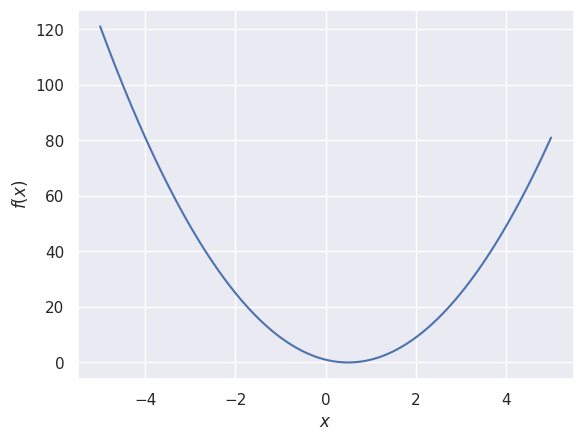

In [ ]:
X = np.linspace(-5, 5, 100).reshape(100, 1)
Y = f([X])
plt.plot(X, Y)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

### Exercise 3 [3 points]
Run `grad_desc` on the function above using $\eta= 1/8$, $\mathbf{x}_0 = -2$, a stopping condition of $0.01$, and `max_iter=500` (the default). saving the resulting `xs` and `fs`. Then, using `plot_grad_desc_1d` with the default values, plot the behavior of gradient descent by inputting `f`, `xs`, and `fs`.

In [ ]:
def plot_grad_desc_1d(f, xs, fs, xmin=-3, xmax=3, spacing=200):
  X = np.linspace(xmin, xmax, spacing).reshape(spacing, 1)
  Y = f([X])
  plt.plot(X, Y)
  plt.plot(xs, fs, marker='o', linestyle='dashed', linewidth=2, markersize=4)
  plt.xlabel('$x$')
  plt.ylabel('$f(x)$')
  plt.show()

In [ ]:
# YOUR CODE HERE #

You should see that the function value does, indeed, decrease as gradient descent moves along.

As we talked about in class, the behavior of gradient descent becomes more erratic, however, as we increase the step size.

### Exercise 4 [6 points]
(i) Run `grad_desc` on the function above using $\eta= 1/3$, $\mathbf{x}_0 = -2$, a stopping condition of $0.01$, and `max_iter=500` (the default). saving the resulting `xs` and `fs`. Use `plot_grad_desc_1d` to plot the behavior of gradient descent using this step size.

(ii) Run `grad_desc` on the function above using $\eta = 1/2$, $\mathbf{x}_0 = -2$, a stopping condition of $0.01$, and `max_iter=500` (the default). saving the resulting `xs` and `fs`. Use `plot_grad_desc_1d` to plot the behavior of gradient descent using this step size.

(iii), (iv), (v) Now, experiment with three other step sizes $\eta_3, \eta_4, \eta_5$ of your choosing (this is up to you), but with the same $\mathbf{x}_0 = -2$, a stopping condition of $0.01$, and `max_iter=500`.

(vi) Write a comment in the code cell titled `# YOUR COMMENT HERE (vi) #` that details your choices of $\eta_3, \eta_4,$ and $\eta_5$ along with a verbal explanation of the behavior of gradient descent with each choice. This can just be a description of the visual behavior of the graphs with the different learning rates. How do they compare to the choices of $\eta = 1/8$, $\eta = 1/3$, and $\eta = 1/2$?

In [ ]:
# YOUR CODE HERE (i) #

In [ ]:
# YOUR CODE HERE (ii) #

In [ ]:
# YOUR CODE HERE (iii) #

In [ ]:
# YOUR CODE HERE (iv) #

In [ ]:
# YOUR CODE HERE (v) #

In [ ]:
# YOUR COMMENT HERE (vi) #

All we know about gradient descent so far, however, is that it gets us to a *local minimum*, which might not be a global minimum. We were lucky that $f(x) = 4x^2 - 4x + 1$ was "bowl-shaped," (we will learn that the specific term for this is *convex*). However, in many cases, we will need to optimize non-convex functions. In those cases, unfortunately, gradient descent may get stuck at local minima.

Consider the function $f: \mathbb{R} \rightarrow \mathbb{R}$ given by

$$
f(x) = \sin(x) + \cos(\sqrt{2} x) + \sin(\sqrt{3} x).
$$

Let's now consider tweaking not the learning rate $\eta$, but, rather, the initialization point $x_0$.



In [ ]:
def f(x):
    return np.sin(x[0]) + np.cos(np.sqrt(2) * x[0]) + np.sin(np.sqrt(3) * x[0])

def grad_f(x):
    return np.array([np.cos(x[0]) - np.sqrt(2) * np.sin(np.sqrt(2) * x[0]) + np.sqrt(3) * np.cos(np.sqrt(3) * x[0])])

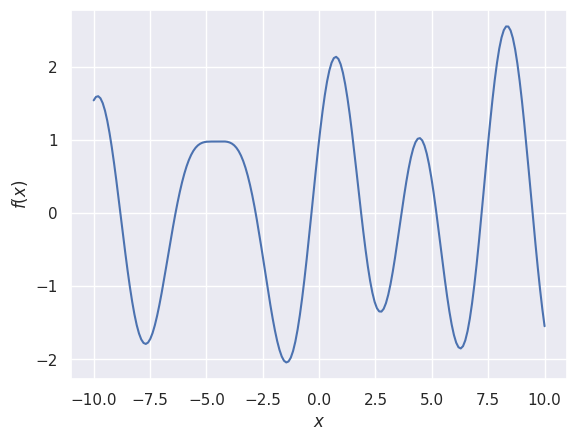

In [ ]:
X = np.linspace(-10, 10, 200).reshape(200, 1)
Y = f([X])
plt.plot(X, Y)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

### Exercise 5 [3 points]
In this exercise, run `grad_desc` with learning rate $\eta = 0.1$, stopping condition $0.01$, and `max_iter=500`. For each of the following three conditions numbered (i), (ii), and (iii), choose three separate initialization points such that the final iterate of gradient descent $f(x_T)$ satisfies the condition. Then, plot the behavior of gradient descent using the supplied `plot_grad_desc_1d` function, using `xmin=-10` and `xmax=10` to get the correct scale. This should result in three separate plots, in the corresponding numbered `# YOUR CODE HERE #` cells below.

(i) $f(x_T) \leq -2$

(ii) $-2 < f(x_T) < -1.5$

(iii) $-1.5 < f(x_T) < -1$

In [ ]:
# YOUR CODE HERE (i) #

In [ ]:
# YOUR CODE HERE (ii) #

In [ ]:
# YOUR CODE HERE (iii) #

## Gradient Descent on quadratic forms
Now, we will consider gradient descent in multiple variables, particularly with functions $f: \mathbb{R}^2 \rightarrow \mathbb{R}$. We will focus on quadratic forms because they have Hessians that we can easily characterize and visually see the difference in.

Consider the function $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ defined by

$$
f(x_1, x_2) = \begin{bmatrix}
x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
4 & -1 \\
-1 & 2
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}.
$$

Clearly, this is a quadratic form, and, expanded out, it looks like:

$$
f(x_1, x_2) = 4x_1 - 2x_1 x_2 + 2 x_2^2
$$

### Exercise 7 [2 points]
By hand, determine the Hessian $\nabla^2 f(\mathbf{x})$ of the above quadratic form. Then, using `np.linalg.eig`, determine the eigenvalues of this quadratic form. This should tell you $\beta$ for which the function is $\beta$-smooth. Using this $\beta$, use **Theorem (Gradient descent makes the function value smaller)** from class (stated above) with the appropriate learning rate $\eta$, initialization $\mathbf{x}_0 = (-5, 10)$, stopping tolerance $0.01$, and `max_iter=500`. Save `xs` and `fs`.

The provided functions `plot_grad_desc_2d` and `plot_grad_desc_2d_contour` should allow you to visualize the behavior of gradient descent. In the code cells below, use these functions function to plot the behavior of gradient descent.

In [ ]:
def plot_grad_desc_2d(f, xs, fs, xmin=-10, xmax=10, ymin=-10, ymax=10, spacing=200):
    X, Y = np.meshgrid(np.linspace(xmin, xmax, spacing), np.linspace(ymin, ymax, spacing))
    X = np.linspace(xmin, xmax, spacing)
    Y = np.linspace(ymin, ymax, spacing)
    X, Y = np.meshgrid(X, Y)
    Z = f([X, Y])

    # Plot in 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, facecolors = cm.jet(Z/np.amax(Z)))
    xs = np.array(xs)
    ax.plot(xs[:, 0], xs[:, 1], fs, marker='o', linestyle='dashed', color='black', linewidth=2, markersize=4)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    plt.show()

def plot_grad_desc_2d_contour(f, xs, fs, xmin=-10, xmax=10, ymin=-10, ymax=10, spacing=100):
    X = np.linspace(xmin, xmax, spacing)
    Y = np.linspace(ymin, ymax, spacing)
    X, Y = np.meshgrid(X, Y)
    Z = f([X, Y])

    # Plot contour
    cmap = plt.colormaps["jet"]
    plt.contourf(X, Y, Z, spacing, cmap=cmap)
    xs = np.array(xs)
    plt.plot(xs[:, 0], xs[:, 1], marker='o', linestyle='dashed', color='black', linewidth=2, markersize=4)
    plt.colorbar()
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

def f(x):
    return 4 * x[0] - 2 * x[0] * x[1] + 2 * x[1] ** 2

def grad_f(x):
    return np.array([4 * x[0] - 2 * x[1], -2 * x[0] + 4 * x[1]])

In [ ]:
# YOUR CODE HERE #

### Exercise 8 [3 points]
This exercise is a bit of a "choose your own adventure." Following the template above for `f` and `grad_f`, construct three functions $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ following the specifications in (i), (ii), and (iii) and plot their gradient descent behavior using `grad_desc`, `plot_grad_desc_2d` and `plot_grad_desc_2d_contour`.

(i) A positive definite quadratic form with $\lambda_1, \lambda_2 > 0$.

(ii) A positive semidefinite quadratic form with one eigenvalue $\lambda_1 > 0$ and $\lambda_2 = 0$.

(iii) An indefinite quadratic form with one eigenvalue $\lambda_1 > 0$ and the other eigenvalue $\lambda_2 < 0$.


For the hyperparameters, use $\eta$ set according to **Theorem (Gradient descent makes function value smaller)** stated above (you may determine the $\beta$-smoothness through `np.linalg.eig`). Use a stopping tolerance of $0.01$ and `max_iter=500`. You may initialize $\mathbf{x}_0$ anywhere you'd like, but try to choose one so that gradient descent runs for at least a fair amount of steps observable from the plots.

In [ ]:
# YOUR CODE HERE (i) #

In [ ]:
# YOUR CODE HERE (ii) #

In [ ]:
# YOUR CODE HERE (iii) #